In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [45]:
def step(x):
    return np.where(x>0,1,0)

In [46]:
def linear(x):
    return x

In [47]:
# 0보다 작으면,0, 0보다 크면 자기자신
def relu(x):
    return np.where(x>0,x,0)

In [76]:
def softmax(x):
    x = x - np.max(x,axis=1).reshape(-1,1)
    return np.exp(x)/np.sum(np.exp(x), axis=1).reshape(-1,1)

In [73]:
x = np.array([[1,2,3],[1,2,8],[3,3,4]])

In [74]:
x = x - np.max(x,axis=1).reshape(-1,1)
x

array([[-2, -1,  0],
       [-7, -6,  0],
       [-1, -1,  0]])

In [75]:
np.exp(x)/np.sum(np.exp(x), axis=1).reshape(-1,1)

array([[9.00305732e-02, 2.44728471e-01, 6.65240956e-01],
       [9.08800555e-04, 2.47037604e-03, 9.96620823e-01],
       [2.11941558e-01, 2.11941558e-01, 5.76116885e-01]])

In [77]:
softmax(x)

array([[9.00305732e-02, 2.44728471e-01, 6.65240956e-01],
       [9.08800555e-04, 2.47037604e-03, 9.96620823e-01],
       [2.11941558e-01, 2.11941558e-01, 5.76116885e-01]])

In [78]:
def cross_entropy(y,t):
    return -np.sum(t*np.log(y))

In [49]:
x = np.random.randn(3,3)

In [50]:
x = np.random.randn(50)

In [51]:
relu(x)

array([0.        , 0.        , 1.68337096, 0.64144542, 0.        ,
       0.        , 0.        , 0.40937035, 0.67251074, 0.        ,
       0.38957757, 0.        , 0.        , 1.59680709, 0.        ,
       1.54122379, 0.        , 0.        , 0.67382687, 1.46320888,
       0.67144118, 0.        , 1.38033003, 0.        , 0.38112662,
       1.01058591, 0.        , 0.05936204, 1.3257044 , 1.3993883 ,
       0.97976551, 0.30058567, 0.90359679, 1.09065309, 0.        ,
       0.        , 0.21742826, 0.        , 1.22416712, 0.16467334,
       0.        , 0.9728521 , 0.        , 1.39021702, 0.11840996,
       0.        , 0.        , 0.83656643, 0.        , 1.43723772])

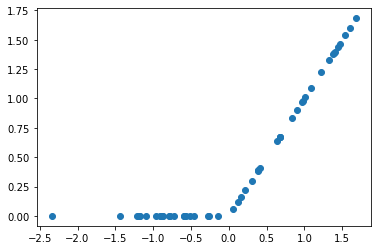

In [52]:
plt.scatter(x,relu(x))

In [53]:
x = np.linspace(-5,5,100)

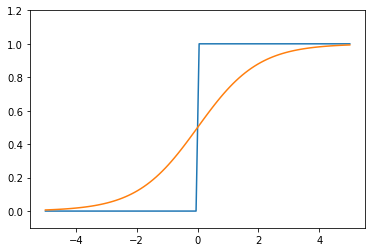

In [54]:
plt.ylim(-0.1,1.2)
# plt.plot(x, linear(x))
plt.plot(x, step(x))
plt.plot(x, sigmoid(x))

In [3]:
# 필요한 라이브러리 불러오기
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

# MNIST 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 이미지 데이터 준비하기 (모델에 맞는 크기로 바꾸고 0과 1사이로 스케일링)
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# 레이블을 범주형으로 인코딩
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 모델 정의하기 (여기에서는 Sequential 클래스 사용)
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일 하기
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# fit() 메서드로 모델 훈련 시키기
model.fit(train_images, train_labels, epochs=100, batch_size=128)

# 테스트 데이터로 정확도 측정하기
#test_loss, test_acc = model.evaluate(test_images, test_labels)
#print('test_acc: ', test_acc)

Epoch 1/100
469/469 [==============================] - 2s 3ms/step - loss: 0.2577 - accuracy: 0.9255
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1034 - accuracy: 0.9693
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0671 - accuracy: 0.9798
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0491 - accuracy: 0.9852
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0367 - accuracy: 0.9889
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0286 - accuracy: 0.9912
Epoch 7/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0215 - accuracy: 0.9937
Epoch 8/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0165 - accuracy: 0.9952
Epoch 9/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0130 - accuracy: 0.9962
Epoch 10/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0102 - accura

KeyboardInterrupt: 